In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification
X,y= make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

In [3]:
y

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression


In [5]:
# hyperparameter tuning
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_value=[100,10,1,0.1,0.01]
solver=['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
prams=dict(penalty=penalty,C=c_value,solver=solver)

In [10]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

In [11]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=model,param_grid=prams,scoring='accuracy',cv=cv,n_jobs=-1)

In [12]:
grid.fit(X_train, y_train)

c:\Users\user\Desktop\aimlproj\nenv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
250 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\Desktop\aimlproj\nenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\Desktop\aimlproj\nenv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\user\Desktop\aimlproj\nenv\Lib\site-packages\sklearn\linear_model\_

,estimator,LogisticRegression()
,param_grid,"{'C': [100, 10, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['lbfgs', 'liblinear', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [13]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [14]:
# so our best parameters are:
# {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
model=LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [16]:
y_pred=model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

acc=accuracy_score(y_test,y_pred)
print('accuracy=',acc)
cm=confusion_matrix(y_test,y_pred)
print('conf_matrix=',cm)
print(classification_report(y_test,y_pred))

accuracy= 0.87
conf_matrix= [[99 12]
 [14 75]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       111
           1       0.86      0.84      0.85        89

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



In [23]:
from sklearn.metrics import roc_auc_score,roc_curve
roc_auc=roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
roc_auc

0.9275230286466242

In [24]:
model.predict_proba(X_test)

array([[9.52701585e-01, 4.72984149e-02],
       [9.06579136e-02, 9.09342086e-01],
       [2.34977343e-01, 7.65022657e-01],
       [8.91357724e-01, 1.08642276e-01],
       [2.38121712e-02, 9.76187829e-01],
       [9.34908704e-01, 6.50912964e-02],
       [8.93226163e-01, 1.06773837e-01],
       [3.76609927e-01, 6.23390073e-01],
       [9.46603123e-01, 5.33968773e-02],
       [5.86905324e-01, 4.13094676e-01],
       [6.61998870e-01, 3.38001130e-01],
       [8.35889746e-04, 9.99164110e-01],
       [9.09906139e-01, 9.00938607e-02],
       [6.24801953e-01, 3.75198047e-01],
       [8.21132614e-01, 1.78867386e-01],
       [1.26162816e-01, 8.73837184e-01],
       [8.31614683e-01, 1.68385317e-01],
       [1.19561683e-02, 9.88043832e-01],
       [5.02224060e-02, 9.49777594e-01],
       [4.63756496e-02, 9.53624350e-01],
       [2.67901775e-01, 7.32098225e-01],
       [1.75115175e-01, 8.24884825e-01],
       [1.71102277e-03, 9.98288977e-01],
       [9.99791430e-01, 2.08569665e-04],
       [8.025571

In [26]:
model_prob=model.predict_proba(X_test)
model_prob=model_prob[:,1]
model_fpr,model_tpr,threshholds=roc_curve(y_test,model_prob)

In [29]:
threshholds

array([           inf, 9.99614213e-01, 9.88043832e-01, 9.87261824e-01,
       9.76187829e-01, 9.75737428e-01, 9.10866469e-01, 9.09342086e-01,
       9.09176455e-01, 9.05302553e-01, 8.74736922e-01, 8.67115350e-01,
       6.88912250e-01, 6.23390073e-01, 5.82829846e-01, 5.50985505e-01,
       4.81301374e-01, 4.53741505e-01, 4.50146363e-01, 4.13603199e-01,
       4.13094676e-01, 3.46162532e-01, 3.36218008e-01, 2.88302727e-01,
       2.79754637e-01, 2.60825388e-01, 2.54925562e-01, 2.22295080e-01,
       2.19180952e-01, 1.97442899e-01, 1.95818326e-01, 1.26245172e-01,
       1.24755499e-01, 2.08569665e-04])

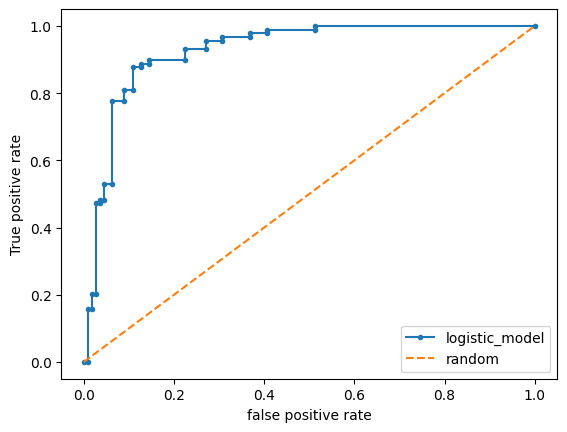

In [28]:
plt.plot(model_fpr,model_tpr,marker='.',label='logistic_model')
plt.plot([0,1],[0,1],linestyle='--',label='random')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.show()


In [30]:
threshholds=0.3
y_pred_new=(model_prob>threshholds).astype(int)

In [31]:

acc=accuracy_score(y_test,y_pred_new)
print('accuracy=',acc)
cm=confusion_matrix(y_test,y_pred_new)
print('conf_matrix=',cm)
print(classification_report(y_test,y_pred_new))

accuracy= 0.83
conf_matrix= [[83 28]
 [ 6 83]]
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       111
           1       0.75      0.93      0.83        89

    accuracy                           0.83       200
   macro avg       0.84      0.84      0.83       200
weighted avg       0.85      0.83      0.83       200

